In [2376]:
# Dependencies
import pandas as pd
import warnings
import numpy as np
np.random.seed(10)
from pathlib import Path
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2377]:
# Read in crypto data csv
path = Path('Resources/crypto_data.csv')
df = pd.read_csv(path)
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [2378]:
# Check # of rows and columns
df.shape

(1252, 7)

In [2379]:
# Get indexes where IsTrading is False
indexNames = df[df['IsTrading'] == False].index

# Delete False rows from dataframe
df.drop(indexNames, inplace=True)


In [2380]:
# Recheck # of rows and columns to make sure False values dropped
df.shape

(1144, 7)

In [2381]:
# Drop IsTrading column
df = df.drop(columns='IsTrading')


In [2382]:
# Preview dataframe
df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [2383]:
# Drop rows with null values
df = df.dropna(how='any', axis=0)

In [2384]:
# Any drops?
df.shape

(685, 6)

In [2385]:
# Filter for cryptocurrencies that have been mined
df = df.loc[df['TotalCoinsMined'] !=0]


In [2386]:
# Any drops?
df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [2387]:
# Drop CoinName column
df = df.drop(columns='CoinName')

In [2388]:
# Preview dataframe
df.head()

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0


In [2389]:
# Drop Unnamed: 0 column
df = df.drop(columns='Unnamed: 0')

In [2390]:
df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [2391]:
# Convert Algorithm and ProofType to numerical data by creating dummy variables
dummy_df = pd.get_dummies(df, columns=['Algorithm', 'ProofType'])
dummy_df.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2392]:
# Check data types
dummy_df.dtypes

TotalCoinsMined                     float64
TotalCoinSupply                      object
Algorithm_1GB AES Pattern Search      uint8
Algorithm_536                         uint8
Algorithm_Argon2d                     uint8
                                     ...   
ProofType_Proof of Authority          uint8
ProofType_Proof of Trust              uint8
ProofType_TPoS                        uint8
ProofType_Zero-Knowledge Proof        uint8
ProofType_dPoW/PoW                    uint8
Length: 100, dtype: object

In [2393]:
# Convert object data types to float and verify
dummy_df['TotalCoinSupply'] = pd.to_numeric(dummy_df.TotalCoinSupply, errors='coerce')
dummy_df.dtypes


TotalCoinsMined                     float64
TotalCoinSupply                     float64
Algorithm_1GB AES Pattern Search      uint8
Algorithm_536                         uint8
Algorithm_Argon2d                     uint8
                                     ...   
ProofType_Proof of Authority          uint8
ProofType_Proof of Trust              uint8
ProofType_TPoS                        uint8
ProofType_Zero-Knowledge Proof        uint8
ProofType_dPoW/PoW                    uint8
Length: 100, dtype: object

In [2394]:
# Standardize data with StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dummy_df[['TotalCoinsMined', 'TotalCoinSupply']])


In [2395]:
# Create new df from scaled data
scaled_df = pd.DataFrame(scaled_data, columns=dummy_df.columns[0:2])
scaled_df.head()

,TotalCoinsMined,TotalCoinSupply
0,-0.116748,-0.152865
1,-0.093589,-0.144996
2,0.525872,4.493764
3,-0.116354,-0.152554
4,-0.114384,-0.152865


In [2396]:
# Drop old totalcoinsmined and totalcoinsupply columns
dummy_df = dummy_df.drop(columns=['TotalCoinsMined', 'TotalCoinSupply']).reset_index()
dummy_df.shape


(533, 99)

In [2397]:
# Add scaled columns to dummy_df
dummy_df['TotalCoinsMined'] = scaled_df['TotalCoinsMined']
dummy_df['TotalCoinSupply'] = scaled_df['TotalCoinSupply']
dummy_df.head()

,index,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW,TotalCoinsMined,TotalCoinSupply
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.116748,-0.152865
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.093589,-0.144996
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.525872,4.493764
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.116354,-0.152554
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.114384,-0.152865


In [2398]:
# Drop old index
dummy_df = dummy_df.drop(columns='index')
dummy_df.head()

,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,...,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW,TotalCoinsMined,TotalCoinSupply
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.116748,-0.152865
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.093589,-0.144996
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.525872,4.493764
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.116354,-0.152554
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.114384,-0.152865


In [2399]:
# Initialize PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the data
data_pca = pca.fit_transform(dummy_df)

In [2400]:
df_pca = pd.DataFrame(data=data_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.208958,-0.801427,0.172224,-0.673560,-0.027430,-0.027398,0.002285,-0.017042,-0.047475,-0.023047,-0.007854,0.015752
1,-0.187051,-0.803933,0.161796,-0.674183,-0.028179,-0.027263,0.002390,-0.018029,-0.047623,-0.023082,-0.007758,0.015852
2,3.533384,-0.301848,2.918907,0.408402,-0.165250,-0.258806,-0.276661,-0.157987,0.746416,0.361791,-0.233827,-0.070313
3,-0.179922,0.694159,-0.166384,0.239206,-0.278880,-0.613804,0.625231,-0.014096,0.027610,0.009421,-0.026222,-0.026431
4,-0.173076,0.688440,-0.155140,0.131556,-0.212780,-0.104400,-0.241489,-0.000372,0.113308,-0.125766,0.058158,-0.129291


In [2401]:
# Fetch the explained variance
pca.explained_variance_ratio_.sum()

0.9039499316205345

In [2402]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=100)

In [2403]:
# Further reduce dimensions
tsne_features = tsne.fit_transform(df_pca)

In [2404]:
# See shape
tsne_features.shape

(533, 2)

In [2405]:
# Initializing model with K = 5
model = KMeans(n_clusters=5)

In [2406]:
# Fit model
model.fit(df_pca)

KMeans(n_clusters=5)

In [2407]:
# Get predictions
predictions = model.predict(df_pca)
print(predictions)


[3 3 3 2 2 2 3 2 2 2 0 2 3 0 2 3 2 2 3 3 2 2 2 2 2 3 2 2 2 3 2 3 2 2 3 3 2
 2 2 2 2 2 0 3 2 2 2 2 2 3 0 2 3 2 2 2 2 3 2 2 0 2 3 0 3 2 2 2 3 3 3 3 3 2
 2 2 0 3 2 0 2 0 3 2 2 2 2 3 3 2 3 2 2 3 0 2 3 3 2 2 0 0 2 3 3 2 0 2 3 2 0
 2 3 3 2 2 0 2 2 2 3 2 2 2 2 2 3 0 2 2 2 3 2 0 2 2 0 2 3 2 3 3 2 2 3 2 2 3
 3 2 3 2 3 3 0 2 2 2 2 3 0 3 3 0 2 2 3 3 3 3 3 2 0 3 3 3 0 2 0 0 3 3 2 3 2
 3 3 2 3 2 0 2 3 2 3 0 3 3 2 0 0 3 0 3 2 2 0 3 2 2 3 3 0 3 3 2 0 3 3 3 0 3
 3 3 2 3 0 3 3 0 3 2 2 2 3 3 3 3 2 3 2 0 3 2 0 2 2 3 2 2 0 2 3 3 3 2 0 3 2
 0 3 3 3 3 0 3 2 0 2 0 3 3 0 2 0 2 3 2 2 2 2 3 2 3 3 2 3 2 2 2 3 2 3 2 2 2
 0 2 3 2 3 0 0 2 0 2 2 2 2 2 3 3 2 0 0 3 2 3 2 3 2 0 2 3 3 3 3 2 3 3 2 0 3
 0 2 2 2 2 3 0 3 3 2 3 2 2 2 0 0 2 2 3 3 2 3 2 2 2 0 2 2 3 3 0 2 2 2 0 0 3
 4 2 3 2 2 2 2 0 0 0 2 2 2 3 0 3 3 0 0 2 2 2 2 3 3 3 2 0 2 0 0 3 0 2 3 0 2
 0 3 2 2 0 2 0 2 2 2 2 3 0 2 3 2 3 0 2 0 0 0 2 2 2 3 0 3 0 3 0 2 3 2 2 2 2
 0 3 0 0 2 3 0 2 3 0 2 0 2 0 2 2 0 0 2 3 2 2 0 2 2 3 2 3 2 0 3 2 0 3 3 3 3
 2 2 2 3 0 3 2 3 2 3 2 3 

In [2408]:
df_pca["class"] = model.labels_
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,class
0,-0.208958,-0.801427,0.172224,-0.673560,-0.027430,-0.027398,0.002285,-0.017042,-0.047475,-0.023047,-0.007854,0.015752,3
1,-0.187051,-0.803933,0.161796,-0.674183,-0.028179,-0.027263,0.002390,-0.018029,-0.047623,-0.023082,-0.007758,0.015852,3
2,3.533384,-0.301848,2.918907,0.408402,-0.165250,-0.258806,-0.276661,-0.157987,0.746416,0.361791,-0.233827,-0.070313,3
3,-0.179922,0.694159,-0.166384,0.239206,-0.278880,-0.613804,0.625231,-0.014096,0.027610,0.009421,-0.026222,-0.026431,2
4,-0.173076,0.688440,-0.155140,0.131556,-0.212780,-0.104400,-0.241489,-0.000372,0.113308,-0.125766,0.058158,-0.129291,2


In [2409]:
# The first column of transformed features
df_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_pca['y'] = tsne_features[:,1]

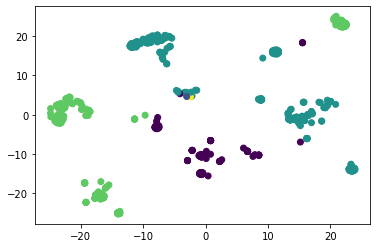

In [2410]:
# Visualize the clusters with colors
plt.scatter(df_pca['x'], df_pca['y'], c=df_pca['class'])
plt.show()

C:\Users\c_ris\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


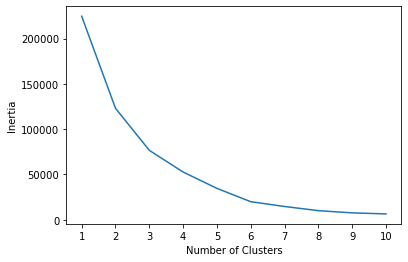

In [2411]:
# Create elbow plot to find best # of clusters
inertia = []
k = [1,2,3,4,5,6,7,8,9,10]

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i)
    km.fit(df_pca)
    inertia.append(km.inertia_)

# Define a Dataframe to plot the Elbow Curve using hvPlot
elbow_data = {'k': k, 'inertia': inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()